In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
# Load the dataset
X = pd.read_csv('CC_GENERAL.csv')

In [3]:
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis=1)

In [4]:
# Handling the missing values using forward fill
X.ffill(inplace=True)

In [5]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Normalizing the data
X_normalized = normalize(X_scaled)

In [7]:
# Converting the numpy array into a pandas DataFrame
DataFrameX_normalized = pd.DataFrame(X_normalized)

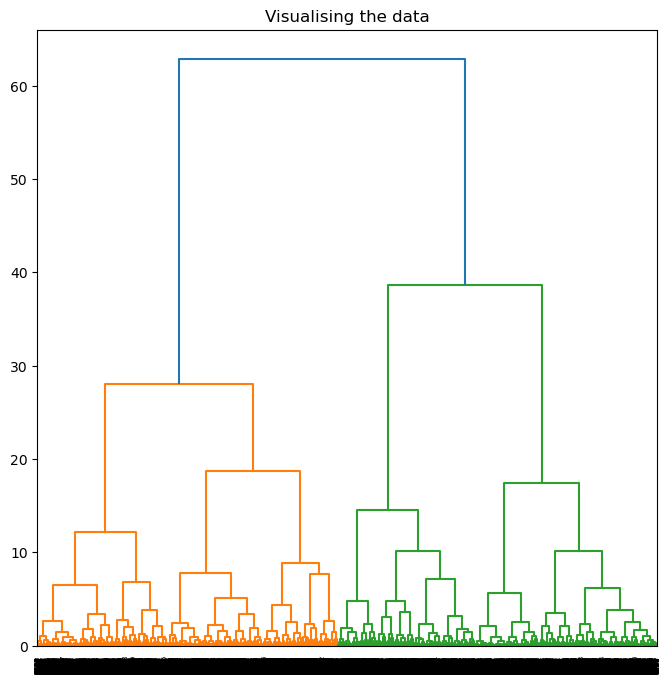

In [8]:
# Reducing the dimensionality of the Data
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])


# Visualizing theworking of the Dendrograms
# Dendrograms are used to divide a given clusterinto many different clusters
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

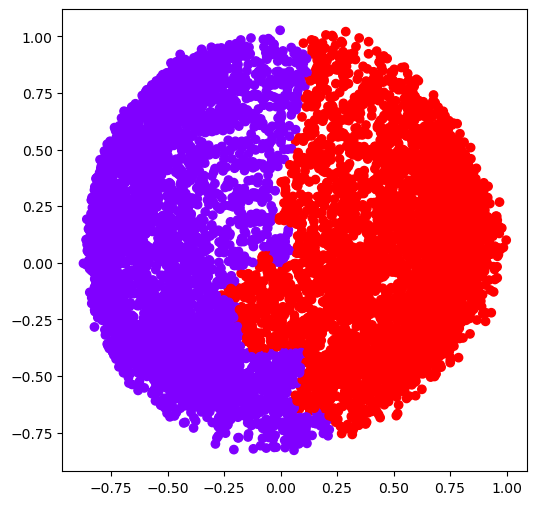

In [9]:
# Building and Visualizing the different clustering models for different values of k
# k = 2
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

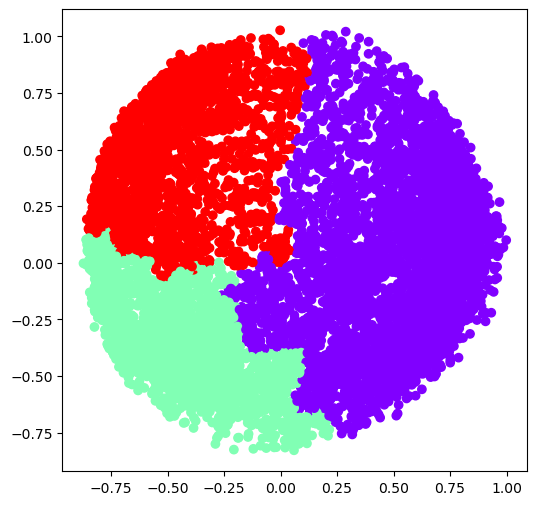

In [10]:
# k = 3
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

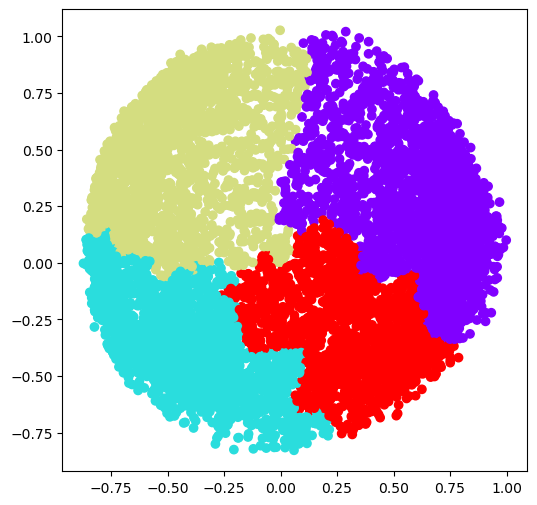

In [11]:
# k = 4
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

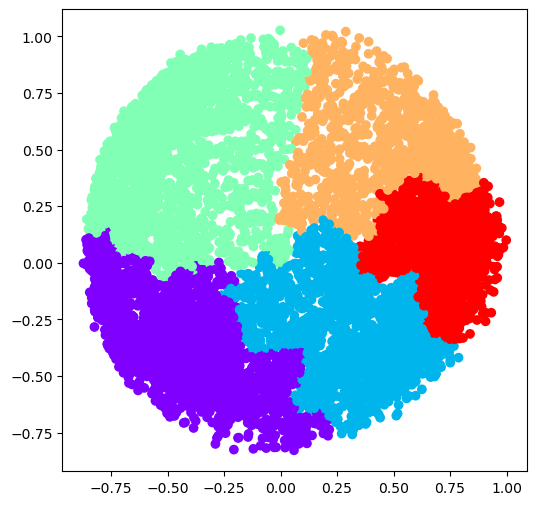

In [12]:
# k = 5
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

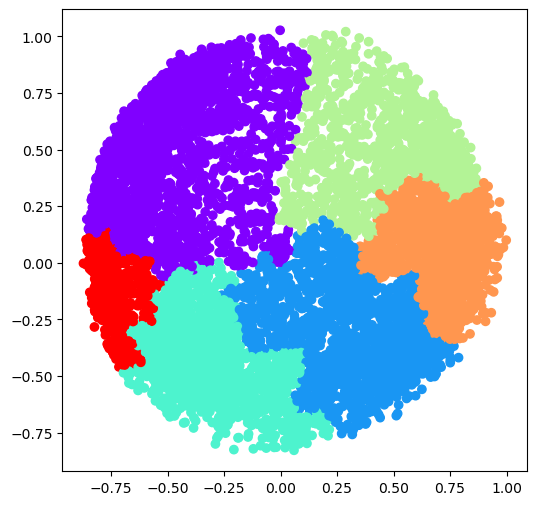

In [13]:
# k = 6
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [14]:
# Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6]

In [15]:
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))
print(silhouette_scores)

[0.4323676809223543, 0.42784474873076395, 0.3746584136419979, 0.3551247358607063, 0.31685886044012085]


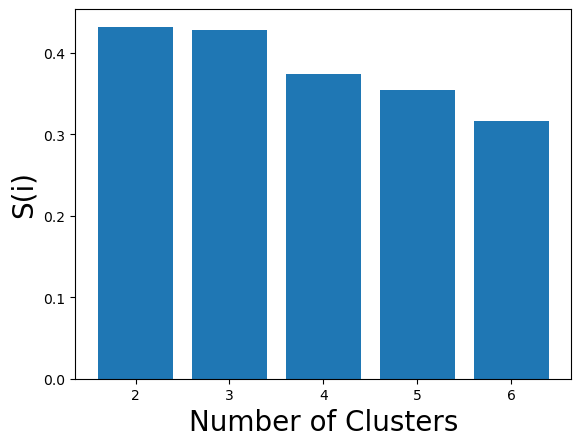

In [16]:
# Plotting a bar graph to compare the results
plt.bar(k,silhouette_scores)
plt.xlabel('Number of Clusters', fontsize = 20)
plt.ylabel('S(i)',fontsize = 20)
plt.show()